In [ ]:
pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 29.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import io
import base64

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


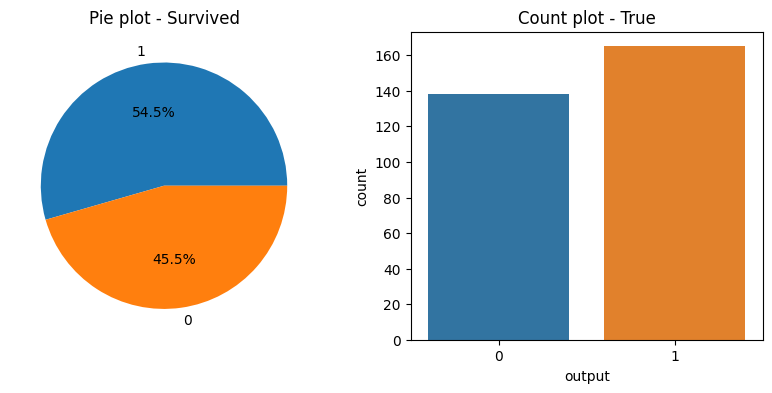

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
data['output'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='output', data=data, ax=ax[1])
ax[1].set_title('Count plot - True')
plt.show()

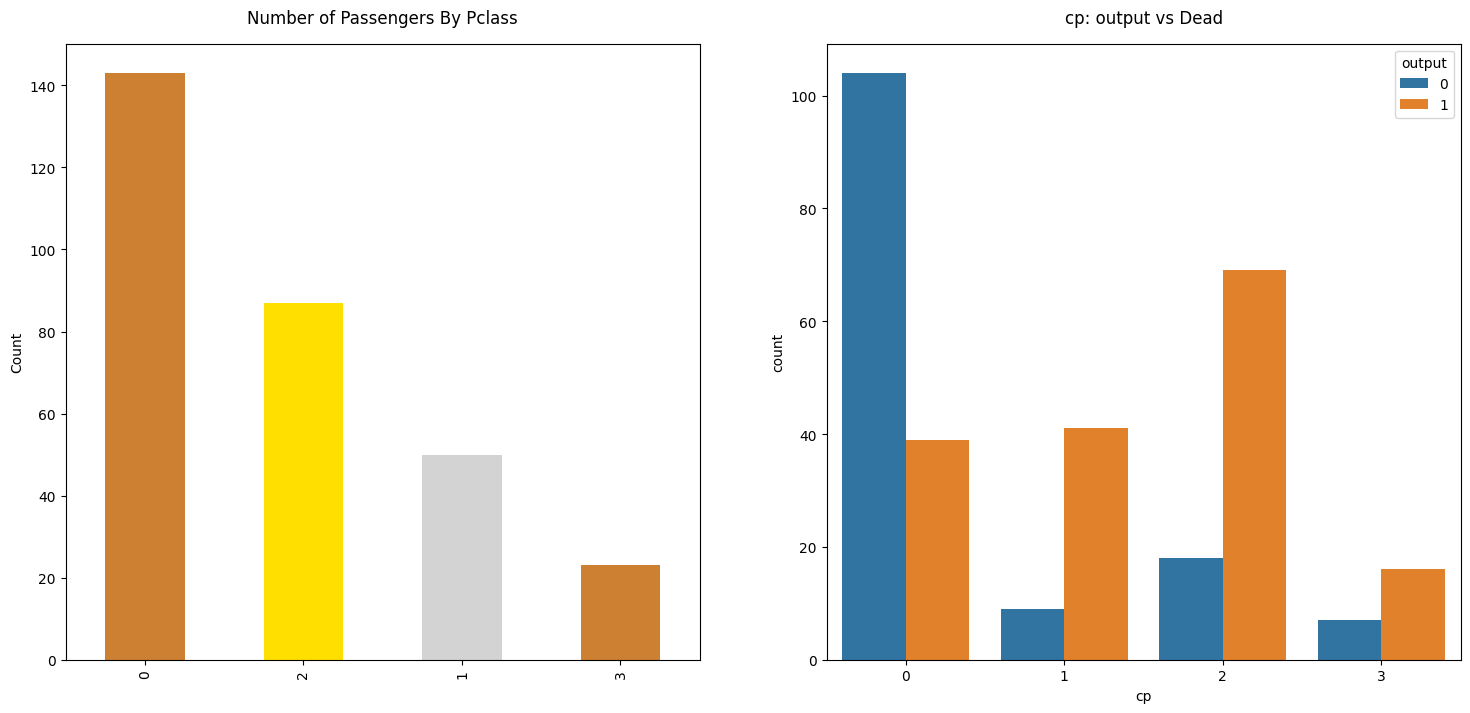

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['cp'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='cp', hue='output', data=data, ax=ax[1])
ax[1].set_title('cp: output vs Dead', y=y_position)
plt.show()

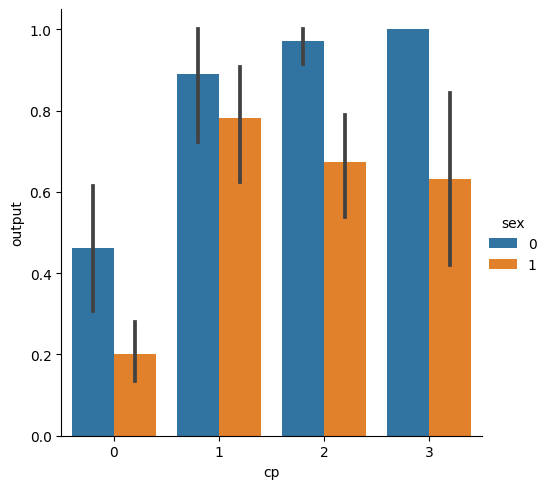

In [ ]:
sns.catplot(x='cp', y='output', hue='sex', kind='bar', data=data)

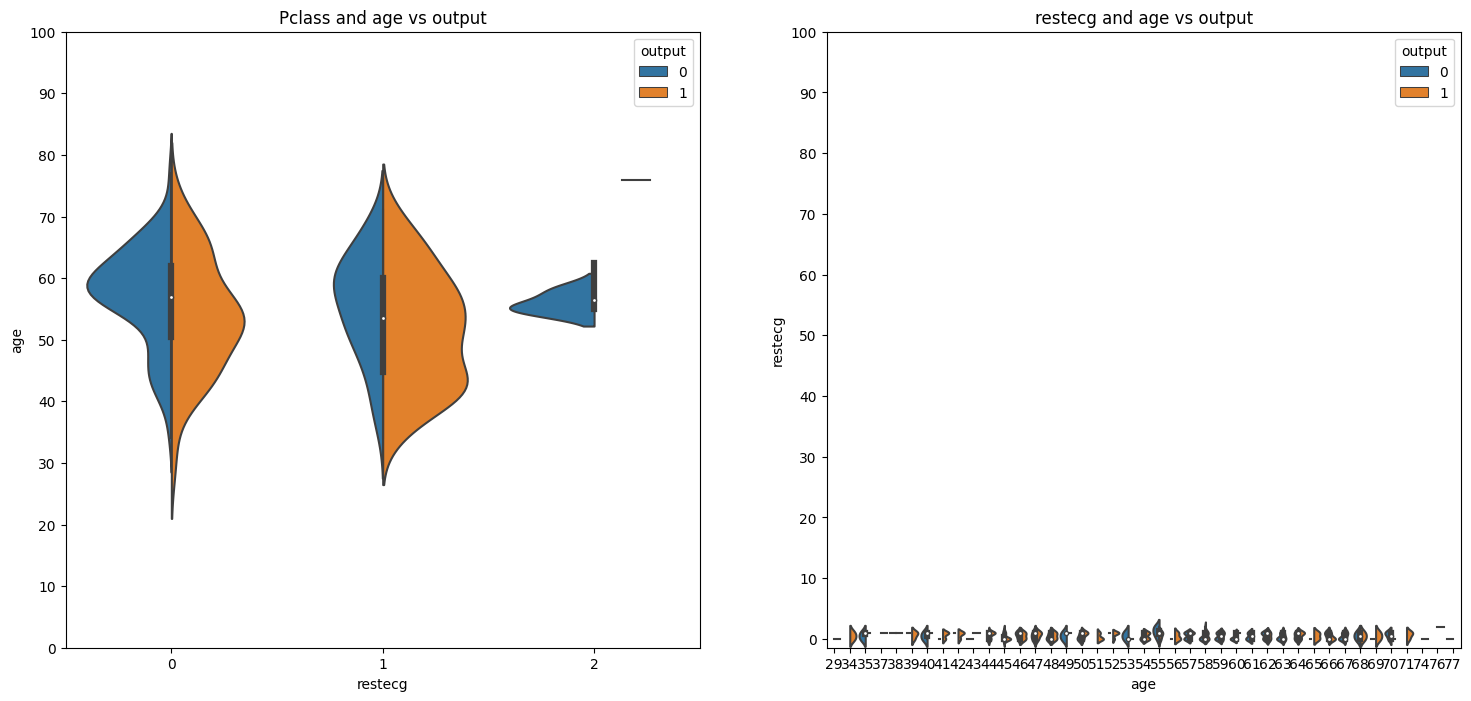

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="restecg",y="age", hue="output", data=data, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and age vs output')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="age",y="restecg", hue="output", data=data, scale='count', split=True,ax=ax[1])
ax[1].set_title('restecg and age vs output')
ax[1].set_yticks(range(0,110,10))
plt.show()

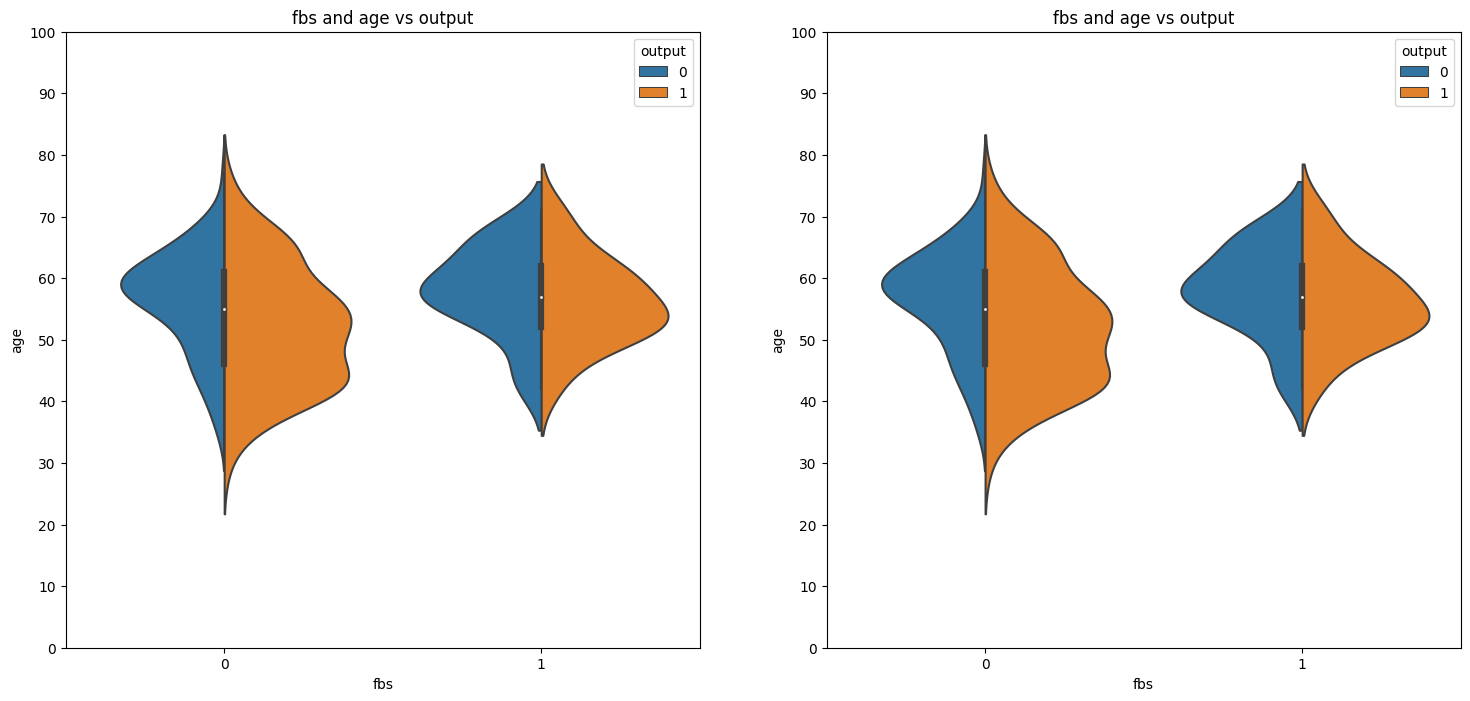

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="fbs",y="age", hue="output", data=data, scale='count', split=True,ax=ax[0])
ax[0].set_title('fbs and age vs output')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="fbs",y="age", hue="output", data=data, scale='count', split=True,ax=ax[1])
ax[1].set_title('fbs and age vs output')
ax[1].set_yticks(range(0,110,10))
plt.show()

Image Variable: 

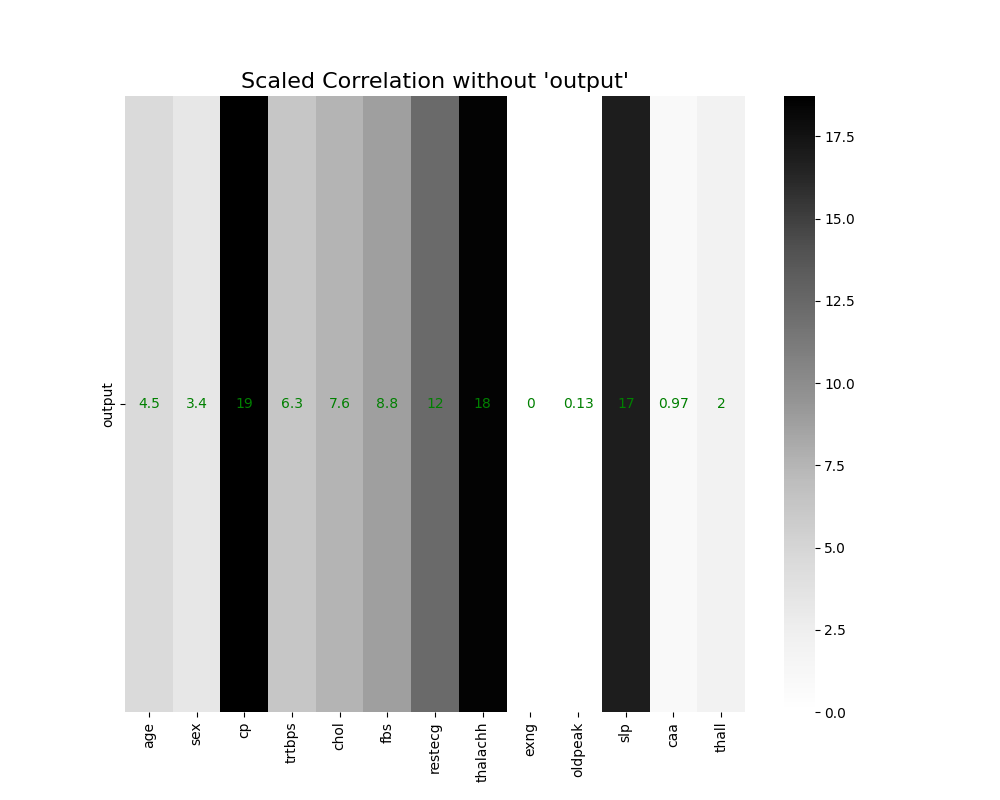

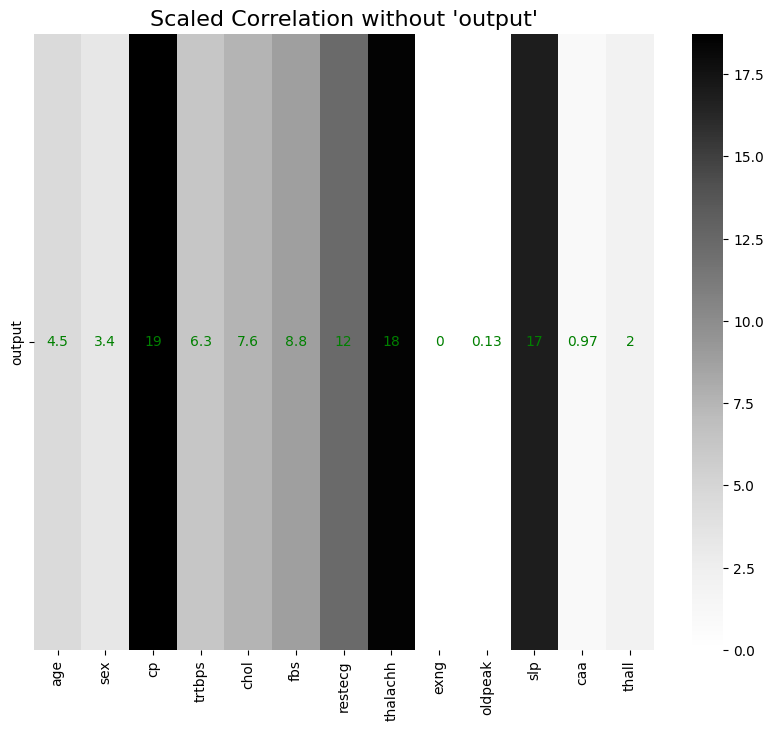

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
features = data.drop('output', axis=1)
out = data.drop(data.columns[0:13], axis=1)
# 스케일링 작업
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns)
scaled_df['output'] = out
# 상관관계 분석
correlation_matrix = scaled_df.corr()
output_correlation = correlation_matrix.drop('output')['output']
scaled_output_correlation = (output_correlation - output_correlation.min()) / (output_correlation.max() - output_correlation.min())
scaled_output_correlation = (scaled_output_correlation / scaled_output_correlation.sum()) * 100
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=scaled_output_correlation.to_frame().T, annot=True, annot_kws=dict(color='g', fontsize=10), cmap='Greys')
plt.title("Scaled Correlation without 'output'", fontsize=16)

buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_heart1 = base64.b64encode(buffer.getvalue()).decode('utf-8')

# Base64 주소를 변수에 저장
image_heart1 = "data:image/png;base64," + image_heart1
print(f"Image Variable: {image_heart1}")
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# 테이블 열 지정
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall' ]
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [ ]:
# 스케일링 작업
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data = pd.get_dummies(data, columns = cat_cols, drop_first = True)
X = data.drop(['output'],axis=1)
y = data[['output']]
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# 로지스틱 회귀 모델 정의
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print(accuracy_score(y_test, y_pred))
predicted_zeros = X_test[y_pred == 0]
predicted_ones = X_test[y_pred == 1]

0.9016393442622951


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predicted_zeros = predicted_zeros.mean()

Image Variable: 

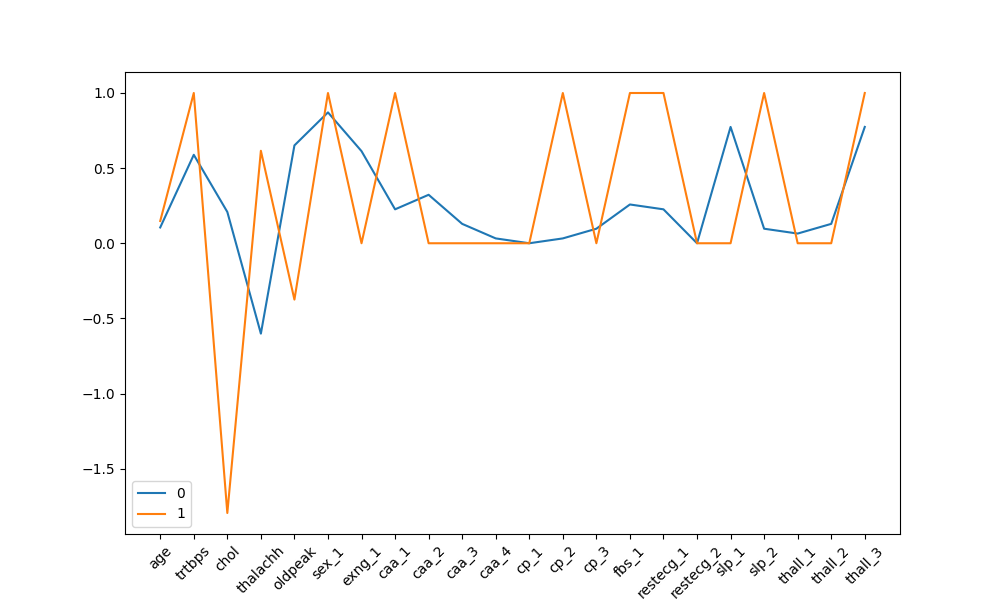

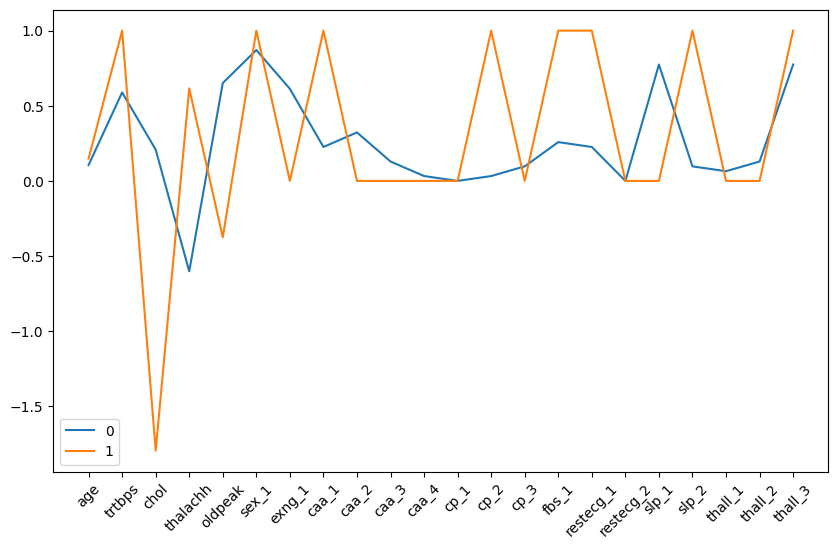

In [ ]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_ones.iloc[0])
plt.legend(['0', '1'])
plt.xticks(rotation=45)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_heart2 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_heart2 = "data:image/png;base64," + image_heart2
print(f"Image Variable: {image_heart2}")
plt.show()

In [ ]:
predicted_one = predicted_ones.mean()

Image Variable: 

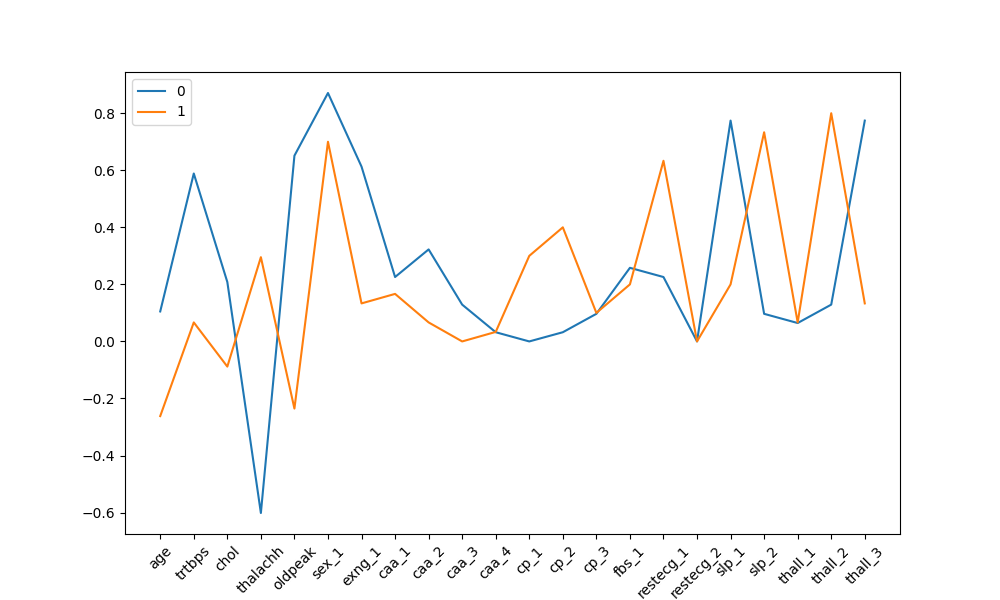

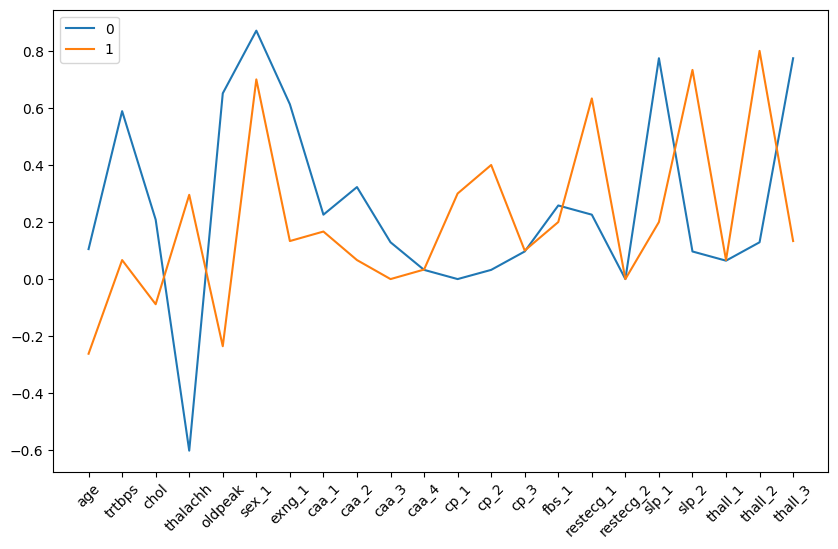

In [ ]:
import io
import base64

plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_one)
plt.legend(['0', '1'])
plt.xticks(rotation=45)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_heart3 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_heart3 = "data:image/png;base64," + image_heart3
print(f"Image Variable: {image_heart3}")
plt.show()

In [ ]:
import mysql.connector
from mysql.connector import errorcode
config = {
  'host':'(your_sql_server_name).mysql.database.azure.com',
  'user':'(your_sql_user)',
  'password':'(your_sql_passwd)',
  'database':'web_db'
}
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()
cursor.execute(f"INSERT INTO heart_attack VALUES(null,'{image_heart1}', '{image_heart2}', '{image_heart3}');")
print("Uploaded", cursor.rowcount, "row(s) of data.")
conn.commit()
cursor.close()
conn.close()
print("Done.")

NameError: ignored